In [1]:
# from tesis.sustainability_indices import (EquityIndex, EquityIndexUniverse, TestAgainstGroup, 
#                                           TestAgainstVariable, YearlyPositionVar)
import pandas as pd
import numpy as np
import ast
from sqlalchemy import create_engine

In [3]:
credentials = ast.literal_eval(open(r"C:\Users\pablo\OneDrive - unizar.es\Python Investigación\credentials.txt", "r").read())
sql_engine = create_engine(credentials['sqlalchemy'][0]+ 'IndexSustainabilityLevel')
indices_details = pd.read_sql('EquityIndexDetails', sql_engine)
indices_details= indices_details[~indices_details['Ticker'].isin(['LS&PMIDC', 'LEUNX150'])] 

css_style="""<style>
    table {
      border-collapse: collapse;
      width: 100%;
    }

    th, td {
      text-align: center;

      padding: 8px;
    }

    tr:nth-child(even) {background-color: rgb(242, 242, 242);}

    </style>
    """

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
Figure 1A

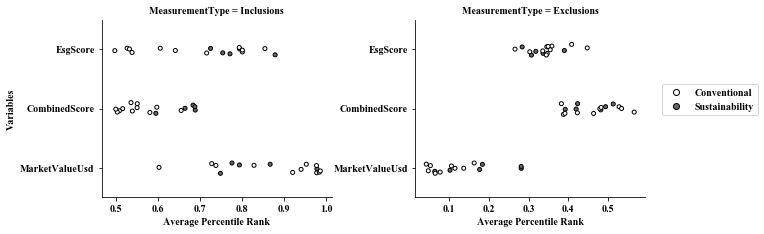

In [5]:
# Figure 1 A
import seaborn as sns
from matplotlib import pyplot
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

df_position = YearlyPositionVar(sql_engine)
plt.rcParams['font.family']="Times New Roman"
plt.rcParams['pdf.fonttype'] = 42
df_position = YearlyPositionVar(sql_engine)

df = df_position.df_position.reset_index()
df = df.loc[df['Year']=='All period', :].melt(id_vars='IndexType', value_vars=[
    'EsgScoreInclusionsMean', 'CombinedScoreInclusionsMean', 'MarketValueUsdInclusionsMean',
    'EsgScoreExclusionsMean', 'CombinedScoreExclusionsMean', 'MarketValueUsdExclusionsMean'
    ],var_name="Variables", value_name = "Average Percentile Rank") 

df["MeasurementType"] =  np.where(df['Variables'].isin(['EsgScoreExclusionsMean', 'CombinedScoreExclusionsMean', 
                                                              'MarketValueUsdExclusionsMean']), 'Exclusions', 'Inclusions')
df.Variables = df.Variables.apply(lambda x: x.replace('Exclusions', "").replace('Inclusions', "").replace('Mean', ""))

a = sns.color_palette(("dimgrey", 'white'))
g = sns.catplot(x="Average Percentile Rank", y="Variables", hue="IndexType", col="MeasurementType", data=df, sharex=False, 
                sharey=False, palette = a, edgecolor='black',  linewidth=1, legend =False, s= 4)

plt.legend(handles=[Line2D([0], [0], marker='o', markerfacecolor="white", markeredgecolor="black", color = "w",label='Conventional'),
                    Line2D([0], [0], marker='o', markerfacecolor="dimgrey", markeredgecolor="black", color = "w",label='Sustainability'), 
                   ], loc="center right",bbox_to_anchor=(1.01,0.5, 0.5, 0.1))
g.fig.set_size_inches(9,3)

g.savefig(r"C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Figure 1 Ex&In Position.pdf", dpi=1200, 
          orientation='portrait')

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
Figure 1B

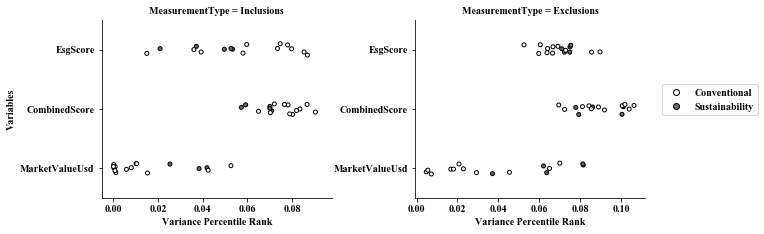

In [7]:
df = df_position.df_position.reset_index()
df = df.loc[df['Year']=='All period', :].melt(id_vars='IndexType', value_vars=[
    'EsgScoreInclusionsVar', 'CombinedScoreInclusionsVar', 'MarketValueUsdInclusionsVar',
    'EsgScoreExclusionsVar', 'CombinedScoreExclusionsVar', 'MarketValueUsdExclusionsVar'
    ],  var_name="Variables", value_name = "Variance Percentile Rank") 
df["MeasurementType"] =  np.where(df['Variables'].isin(['EsgScoreExclusionsVar', 'CombinedScoreExclusionsVar', 
                                                              'MarketValueUsdExclusionsVar']), 'Exclusions', 'Inclusions')
df.Variables = df.Variables.apply(lambda x: x.replace('Exclusions', "").replace('Inclusions', "").replace('Var', ""))

a = sns.color_palette(("dimgrey", 'white'))
g = sns.catplot(x="Variance Percentile Rank", y="Variables", hue="IndexType", col="MeasurementType", data=df, sharex=False, 
                sharey=False, palette = a, edgecolor='black',  linewidth=1, legend =False, s=4)

plt.legend(handles=[Line2D([0], [0], marker='o', markerfacecolor="white", markeredgecolor="black", color = "w",label='Conventional'),
                    Line2D([0], [0], marker='o', markerfacecolor="dimgrey", markeredgecolor="black", color = "w",label='Sustainability'), 
                   ], loc="center right",bbox_to_anchor=(1.01,0.5, 0.5, 0.1))
g.fig.set_size_inches(9,3)

g.savefig(r"C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Figure 2 Ex&In Variance.pdf",
          dpi=1200, orientation='portrait')

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table 1 </strong> Revision of studies

In [66]:
df = pd.read_excel(r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\Old Excel Tables\Table 1 Literature Review.xlsx')
path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table 1 Literature Review.html'
df.set_index('Year',inplace=True)
# save as html table
df.to_html(path_name, index=False)
text_file= open(path_name, "a") # append the css style
text_file.write(css_style)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table 2 </strong> Indices analyzed

In [126]:
df = pd.read_excel(r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\Old Excel Tables\Table 2 Indices Analyzed.xlsx')
path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table 2 Indices Analyzed.html'

# save as html table
df.to_html(path_name, index=False)
text_file= open(path_name, "a") # append the css style
text_file.write(css_style)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table 3</strong> Exclusions vs Maintenances

In [18]:

exclusions_maintenances = TestAgainstGroup(sql_engine, "Exclusions")
path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table 3 Exclusions vs Maintenances.html'

df= exclusions_maintenances.df_test.rename(dict(zip(indices_details.Ticker, indices_details.Name)), axis=1).T
df = df.rename({'Exclusions':'E', 'Maintenances': 'M', 'Universe':'U', 'Inclusions':'I'}, axis =1 , level= 1)
df = df.loc[:,~df.columns.get_level_values(2).isin(['(2)H0: μ1 ≥0.2', '(2)H0: μ1 ≤0.8'])]
df = df.to_html(path_name)
text_file= open(path_name, "a") # append the css style
text_file.write(css_style)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table 4 </strong> Inclusions vs Universe

In [ ]:
inclusions_against = TestAgainstGroup(sql_engine, "Inclusions")
path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table 4 Inclusions vs Universe.html'

df= inclusions_universe.df_test.rename(dict(zip(indices_details.Ticker, indices_details.Name)), axis=1).T
df = df.rename({'Exclusions':'E', 'Maintenances': 'M', 'Universe':'U', 'Inclusions':'I'}, axis =1 , level= 1)
df = df.loc[:,~df.columns.get_level_values(2).isin(['(2)H0: μ1 ≥0.2', '(2)H0: μ1 ≤0.8'])]
df = df.to_html(path_name)
text_file= open(path_name, "a") # append the css style
text_file.write(css_style)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table 5 </strong> CSP agaisnt size

In [ ]:
path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table 5 CSP agaisnt size.html'
exclusions_against = TestAgainstVariable(sql_engine, "Exclusions", "MarketValueUsd")
inclusions_against = TestAgainstVariable(sql_engine, "Inclusions", "MarketValueUsd")


exclusions_against.df_test["level_-1"] = "Exclusions"
df_exclusions =exclusions_against.df_test.set_index("level_-1", append=True).reorder_levels([3,0,1,2])
df_exclusions = df_exclusions.droplevel(2)
inclusions_against.df_test["level_-1"] = "Inclusions"
df_inclusions =inclusions_against.df_test.set_index("level_-1", append=True).reorder_levels([3,0,1,2])
df_inclusions = df_inclusions.droplevel(2)

df = pd.concat([df_exclusions.T, df_inclusions.T], axis=1)
df = df.loc[:, df.columns.get_level_values(2).isin(["mean", "(2)H0:μS = μCSP"])]
df = df.rename(dict(zip(indices_details.Ticker, indices_details.Name)), axis=0)
df = df.rename({'Exclusions':'E', 'Inclusions':'I'}, axis =1 , level= 1)
df.to_html(path_name)
text_file= open(path_name, "a") # append the css style
text_file.write(css_style)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table 6 </strong> CSP var agaisnt size

In [ ]:
path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table 6 CSP var agaisnt size.html'
exclusions_against = TestAgainstVariable(sql_engine, "Exclusions", "MarketValueUsd")
inclusions_against = TestAgainstVariable(sql_engine, "Inclusions", "MarketValueUsd")


exclusions_against.df_test["level_-1"] = "Exclusions"
df_exclusions =exclusions_against.df_test.set_index("level_-1", append=True).reorder_levels([3,0,1,2])
df_exclusions = df_exclusions.droplevel(2)
inclusions_against.df_test["level_-1"] = "Inclusions"
df_inclusions =inclusions_against.df_test.set_index("level_-1", append=True).reorder_levels([3,0,1,2])
df_inclusions = df_inclusions.droplevel(2)

df = pd.concat([df_exclusions.T, df_inclusions.T], axis=1)
df = df.loc[:, df.columns.get_level_values(2).isin(["var", "(1)H0:σ2S = σ2CSP"])]
df = df.rename(dict(zip(indices_details.Ticker, indices_details.Name)), axis=0)
df = df.rename({'Exclusions':'E', 'Inclusions':'I'}, axis =1 , level= 1)
df.to_html(path_name)
text_file= open(path_name, "a") # append the css style
text_file.write(css_style)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table 7 </strong> Regression Inclusions

In [5]:
df_inclusions = pd.read_sql('RegressionInclusions', sql_engine).set_index('IndexTicker')
col_names = {'intercept': 'Intercept', 
             'RankpctEsgScore' : 'P. Rank ESG Score', 
             'RankpctCombinedScore' : 'P. Rank Combined Score',
             'RankpctMarketValueUsd': 'P. Rank Market Value',
             'return_on_assets' : 'ROA',
             'total_liabilities_to_assets' : 'Liabilities to Assets', 
             'additions_fixed_assets_to_assets' : 'Capital Expenditures to Assets', 
             '#' : '#',
             'R-squared': 'Pseudo R-squared'}
df_inclusions=df_inclusions.rename(columns=col_names)

index_names= {ticker : name for (ticker, name) in zip(indices_details['Ticker'], indices_details['Name'])}
df_inclusions = df_inclusions.rename(index=index_names)
df_inclusions = df_inclusions.reindex(index= indices_details['Name'])
df_inclusions['Dependet Variable'] = 'Dummy Inclusion'
df_inclusions.set_index('Dependet Variable', inplace=True, append=True)
df_inclusions = df_inclusions.reorder_levels([1,0])
df_inclusions['#']=df_inclusions['#'].apply(lambda x : "{:,}".format(x))

path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table 7 Probit Inclusion.html'
df_table_html = df_inclusions.T.to_html()
df_table_html = df_table_html.replace("\\n", "<br>")
text_file= open(path_name, "w") # append the css style
text_file.write(css_style+df_table_html)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table 8 </strong> Regression Exclusions

In [6]:
df_exclusions = pd.read_sql('RegressionExclusions', sql_engine).set_index('IndexTicker')
col_names = {'intercept': 'Intercept', 
             'RankpctEsgScore' : 'P. Rank ESG Score', 
             'RankpctCombinedScore' : 'P. Rank Combined Score',
             'RankpctMarketValueUsd': 'P. Rank Market Value',
             'return_on_assets' : 'ROA',
             'total_liabilities_to_assets' : 'Liabilities to Assets', 
             'additions_fixed_assets_to_assets' : 'Capital Expenditures to Assets', 
             '#' : '#',
             'R-squared': 'Pseudo R-squared'}
df_exclusions=df_exclusions.rename(columns=col_names)

index_names= {ticker : name for (ticker, name) in zip(indices_details['Ticker'], indices_details['Name'])}
df_exclusions = df_exclusions.rename(index=index_names)
df_exclusions = df_exclusions.reindex(index= indices_details['Name'])
df_exclusions['Dependet Variable'] = 'Dummy Exclusion'
df_exclusions.set_index('Dependet Variable', inplace=True, append=True)
df_exclusions = df_exclusions.reorder_levels([1,0])
df_exclusions['#']=df_exclusions['#'].apply(lambda x : "{:,}".format(x))

path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table 8 Probit Exclusion.html'
df_table_html = df_exclusions.T.to_html()
df_table_html = df_table_html.replace("\\n", "<br>")
text_file= open(path_name, "w") # append the css style
text_file.write(css_style+df_table_html)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table A1 </strong> Number of firms analyzed 

In [85]:
df = pd.read_excel(r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\Old Excel Tables\Table 3 Number of firms analyzed by year.xlsx',
                  index_col=[0])
path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table A1 Number of firms analyzed by year.html'

# save as html table
df.to_html(path_name, index=True)
text_file= open(path_name, "a") # append the css style
text_file.write(css_style)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table A2</strong> Descriptive statistics of ESG scores and market value 

In [10]:
df = pd.read_excel(r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\Old Excel Tables\Table 4 Descriptive statictics of ESG scores.xlsx',
                  header=[0], index_col=[0,1])
# df.set_index(["Variable", "Geographical area"], inplace = True)
df = df.round(2)
path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table A2 Monthly Descriptive statictics of ESG scores.html'

# save as html table

text_file= open(path_name, "w") # append the css style
text_file.write(df.to_html().replace("NaN", "") + css_style)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table A3 </strong> Descriptive statistics on index compositions and their components.

In [125]:
df = pd.read_excel(r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\Old Excel Tables\Table A1 Index Descriptive Statistics.xlsx',
                  header=[0,1], index_col=[0])
path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table A3 Descriptive statistics on index composition.html'
df = df.reindex(indices_details.Name)
# df  = df.reset_index()
# Add the ** of significance


# save as html table
text_file= open(path_name, "w") # append the css style
text_file.write(df.to_html().replace("NaN", "N/A") + css_style)
text_file.close()

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table A4 </strong> Correlation Matrix.

In [56]:
# # We make the connection to the database
# credentials = ast.literal_eval(open(r"C:\Users\pablo\OneDrive - unizar.es\Python Investigación\credentials.txt", "r").read())
# sql_engine = create_engine(credentials['sqlalchemy'][0]+ 'IndexSustainabilityLevel') 
def significance(p_val):
    if p_val <=0.05 and p_val > 0.01 :
        significance = "*"
    elif p_val <=0.01 and p_val > 0.001:
        significance = "**"
    elif p_val <=0.001 :
        significance = "**"
    else:
        significance=""
    return significance

from scipy.stats import pearsonr
import numpy as np

df_accounting = pd.read_sql('YearlyAccounting', sql_engine,
                           columns = ['isin_code', 'year', 'return_on_assets', 'total_liabilities_to_assets', 
                                      'additions_fixed_assets_to_assets'])
df_universe = pd.read_sql('CompaniesMonthlyData', sql_engine, 
                          columns=['MonthlyDate', 'IsinCode', 'EsgScore', 'CombinedScore', 'MarketValueUsd'])

for variable in ['EsgScore', 'CombinedScore', 'MarketValueUsd']:
    df_universe["Rankpct" + variable] = df_universe.groupby(["MonthlyDate"])[variable].rank( method ="min")
    df_universe["Rankpct" + variable] = df_universe.groupby([
        "MonthlyDate"])["Rankpct" + variable].apply(lambda x: (x-1)/(x.count()-1) )
    
df_universe['YearAccounting']= pd.DatetimeIndex(df_universe['MonthlyDate']).year -1
df_merge = df_universe.merge(df_accounting,how='inner', left_on=['YearAccounting','IsinCode'],
                                       right_on=['year','isin_code'])
df_table = df_merge.loc[:,~df_merge.columns.isin(['year', 'YearAccounting']) ]

df_corr = pd.DataFrame()
for x in df_table:
    for y in df_table:
        try:
            corr = pearsonr(df_table[x], df_table[y])
            df_corr.loc[x,y] = "{:.3f}".format(round(corr[0],3)) + significance(corr[1])
        except: 
            pass

old_names = ['EsgScore', 'CombinedScore', 'MarketValueUsd', 'RankpctEsgScore', 'RankpctCombinedScore', 
             'RankpctMarketValueUsd', 'return_on_assets', 'total_liabilities_to_assets', 'additions_fixed_assets_to_assets']
new_names = ['Esg Score', 'Combined Score', 'Market Value USD', 'Rankpct ESG Score','Rankpct Combined Score', 
 'Rankpct Market Value', 'ROA', 'Total Liabilities to Assets', 'Additions Fixed Assets to Assets']

path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table A4 Correlation Matrix.html'
df_table_html = df_corr.to_html()
for item in range(0, len(old_names)):
    df_table_html = df_table_html.replace(old_names[item], new_names[item])
text_file= open(path_name, "w") # append the css style
text_file.write(css_style+df_table_html)
text_file.close()

In [55]:
df_corr

,EsgScore,CombinedScore,MarketValueUsd,RankpctEsgScore,RankpctCombinedScore,RankpctMarketValueUsd,return_on_assets,total_liabilities_to_assets,additions_fixed_assets_to_assets
EsgScore,1.000**,0.802**,0.332**,0.994**,0.797**,0.477**,0.047**,0.175**,-0.052**
CombinedScore,0.802**,1.000**,0.066**,0.808**,0.981**,0.268**,0.042**,0.105**,-0.040**
MarketValueUsd,0.332**,0.066**,1.000**,0.311**,0.069**,0.493**,0.076**,0.079**,-0.025**
RankpctEsgScore,0.994**,0.808**,0.311**,1.000**,0.813**,0.471**,0.049**,0.174**,-0.051**
RankpctCombinedScore,0.797**,0.981**,0.069**,0.813**,1.000**,0.260**,0.046**,0.105**,-0.037**
RankpctMarketValueUsd,0.477**,0.268**,0.493**,0.471**,0.260**,1.000**,0.169**,0.187**,-0.087**
return_on_assets,0.047**,0.042**,0.076**,0.049**,0.046**,0.169**,1.000**,-0.106**,0.008**
total_liabilities_to_assets,0.175**,0.105**,0.079**,0.174**,0.105**,0.187**,-0.106**,1.000**,-0.173**
additions_fixed_assets_to_assets,-0.052**,-0.040**,-0.025**,-0.051**,-0.037**,-0.087**,0.008**,-0.173**,1.000**


In [28]:
df_table = df_merge.loc[:,~df_merge.columns.isin(['year', 'YearAccounting']) ]
df_table.corr(method=lambda x, y: pearsonr(x, y)[1]).round(4)

,EsgScore,CombinedScore,MarketValueUsd,RankpctEsgScore,RankpctCombinedScore,RankpctMarketValueUsd,return_on_assets,total_liabilities_to_assets,additions_fixed_assets_to_assets
EsgScore,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CombinedScore,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MarketValueUsd,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
RankpctEsgScore,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
RankpctCombinedScore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
RankpctMarketValueUsd,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
return_on_assets,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
total_liabilities_to_assets,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
additions_fixed_assets_to_assets,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<body> <p  style = "font-family:verdana,garamond,serif;font-size:20px;text-align:justify"></body>
<strong> Table A5 -- A7 strong </strong> Clustering results for the exclusions and inclusion process

In [127]:
excel = pd.ExcelFile(r"C:\Users\pablo\OneDrive - unizar.es\Artículo 1\6.1. Tablas y figuras Artículo\Clustering Tabla A1, A2, A3.xlsx")
path_name = r'C:\Users\pablo\OneDrive - unizar.es\Artículo 1\7. Tablas Def\HTML & PDF\Table'
names = [' A6 Clustering results for the exclusion process.html', ' A5 Clustering results for the inclusion process.html',
        ' A7 Clustering results for the exclusions and inclusion process.html']

def cluster_table(df, name):
    df = df.round({'PCA1':2, 'PCA2':2}).drop(columns='IndexType')
    df = df.set_index(['IndexTicker', 'PCA1','PCA2'])
    index_col = df.columns
    # Replace the words we do no need
    index_col = [col.replace(' clusters','').replace(')','') for col in index_col]
    index_col = [col.replace('Agglomerative Clustering','AG').replace('KMeans','KM').replace(
        'Spectral Clustering','SC').replace('Mean Shift','MS').replace('Affinity Propagation','AP') for col in index_col]
    
    # Create the MultiIndex
    mult_index_col = [tuple(map(str, col.split(' ('))) for col in index_col]
    df.columns = pd.MultiIndex.from_tuples(mult_index_col)
    df.columns = pd.MultiIndex.from_frame(df.columns.to_frame().fillna(''), names=["algorithm", "n clusters",]) # fill NaN values in the MultiIndex
    # Change the order
    df = df.reindex(indices_details.Name, level=0,axis=0)
    df = df.reorder_levels([1,0], 1)
    df = df.reindex(columns=['n=2','n=3','n=4','n=5', ''], level=0)
    
    # save as html table
    df.to_html(path_name+ name)
    text_file= open(path_name+name, "a") # append the css style
    text_file.write(css_style)
    text_file.close()
    
    
for sheet, name in zip(range(0,3), names):
    df = pd.read_excel(excel, sheet_name= sheet, index_col=0 )
    cluster_table(df, name)
    